In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Import data
obs_A = pd.read_parquet('data/obs_A.parquet')
est_A = pd.read_parquet('data/est_A.parquet')
obs_B = pd.read_parquet('data/obs_B.parquet')
est_B = pd.read_parquet('data/est_B.parquet')
obs_C = pd.read_parquet('data/obs_C.parquet')
est_C = pd.read_parquet('data/est_C.parquet')
test_A = pd.read_parquet('data/test_A.parquet')
test_B = pd.read_parquet('data/test_B.parquet')
test_C = pd.read_parquet('data/test_C.parquet')

# Set 'date_forecast' as the index
# obs_A = obs_A.set_index('date_forecast')
# est_A = est_A.set_index('date_forecast')
# obs_B = obs_B.set_index('date_forecast')
# est_B = est_B.set_index('date_forecast')
# obs_C = obs_C.set_index('date_forecast')
# est_C = est_C.set_index('date_forecast')

# Concatenate data
A = pd.concat([obs_A, est_A], axis=1)
B = pd.concat([obs_B, est_B], axis=1)
C = pd.concat([obs_C, est_C], axis=1)


In [37]:
# Inspecting data
# A.head()
test_A.describe()

,date_forecast,diffuse_rad:W,direct_rad:W,effective_cloud_cover:p,fresh_snow_24h:cm,sun_elevation:d,absolute_humidity_2m:gm3,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,...,dew_point_2m:K,wind_speed_u_10m:ms,direct_rad_1h:J,diffuse_rad_1h:J,clear_sky_energy_1h:J,wind_speed_10m:ms,wind_speed_v_10m:ms,month,year,hour
count,1536,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,7.200000e+02,7.200000e+02,7.200000e+02,720.000000,720.000000,1536.000000,1536.0,1536.000000
mean,2023-06-01 23:30:00,84.902321,114.781708,64.132294,0.000347,20.294441,8.205903,0.063924,284.723389,69.309792,...,280.800171,1.739271,4.132130e+05,3.056483e+05,1.227651e+06,3.075139,-0.218993,5.562500,2023.0,11.500000
min,2023-05-01 00:00:00,0.000000,0.000000,0.000000,0.000000,-11.534750,3.200000,0.000000,273.799988,0.000000,...,268.100006,-4.275000,0.000000e+00,0.000000e+00,0.000000e+00,0.100000,-4.300000,5.000000,2023.0,0.000000
25%,2023-05-16 23:45:00,8.087500,0.025000,32.675003,0.000000,2.447438,6.693750,0.000000,279.849976,38.918751,...,278.024994,-0.300000,7.144188e+02,3.418273e+04,4.879987e+04,1.593750,-1.300000,5.000000,2023.0,5.750000
50%,2023-06-01 23:30:00,75.300003,13.950000,76.875000,0.000000,19.800625,8.050000,0.000000,284.774994,91.625000,...,281.049988,1.737500,6.590085e+04,2.656778e+05,9.337900e+05,2.950000,-0.300000,6.000000,2023.0,11.500000
75%,2023-06-17 23:15:00,134.231247,184.731247,99.949997,0.000000,38.861813,9.981251,0.100000,288.174988,100.000000,...,284.381256,3.750000,6.564714e+05,4.891316e+05,2.276145e+06,4.206250,0.731250,6.000000,2023.0,17.250000
max,2023-07-03 23:00:00,307.500000,667.799988,100.000000,0.125000,49.903500,13.675000,0.600000,301.950012,100.000000,...,289.549988,9.050000,2.388906e+06,1.098738e+06,2.987530e+06,9.075000,3.800000,7.000000,2023.0,23.000000
std,NaN,78.590271,172.185043,37.369381,0.006584,18.630123,2.178424,0.108791,5.811303,37.675480,...,4.339593,2.714267,6.121721e+05,2.783206e+05,1.101479e+06,1.795148,1.488171,0.583151,0.0,6.924441


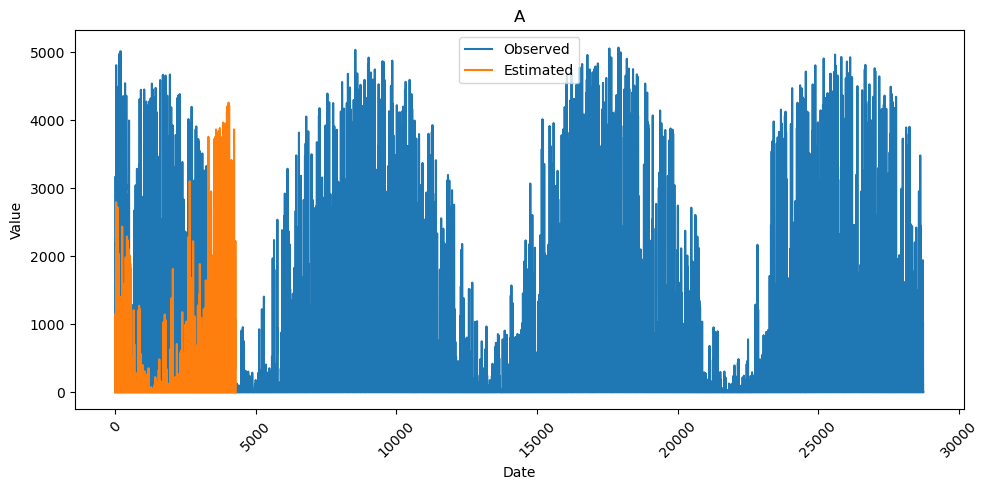

In [31]:
# Location A

plt.figure(figsize=(10, 5))

plt.plot(obs_A['pv_measurement'], label='Observed')
plt.plot(est_A['pv_measurement'], label='Estimated')

plt.title('A')
plt.xlabel('Date')  # Setting label for x-axis
plt.ylabel('Value')  # Setting label for y-axis; replace 'Value' with what's actually being measured
plt.legend()
plt.xticks(rotation=45)  # It's useful to rotate the dates for better readability
plt.tight_layout()  # This will ensure everything fits well
plt.show()


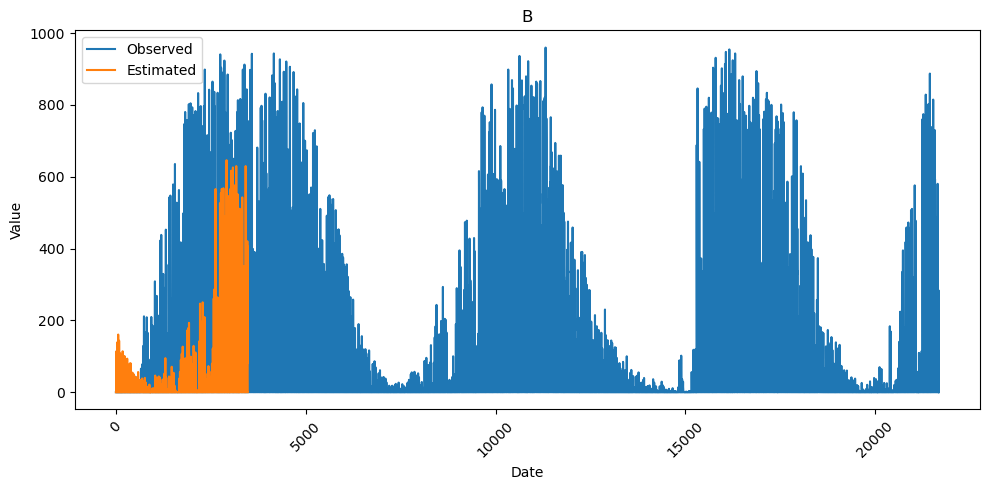

In [32]:
# Location B

plt.figure(figsize=(10, 5))

plt.plot(obs_B['pv_measurement'], label='Observed')
plt.plot(est_B['pv_measurement'], label='Estimated')

plt.title('B')
plt.xlabel('Date')  # Setting label for x-axis
plt.ylabel('Value')  # Setting label for y-axis; replace 'Value' with what's actually being measured
plt.legend()
plt.xticks(rotation=45)  # It's useful to rotate the dates for better readability
plt.tight_layout()  # This will ensure everything fits well
plt.show()


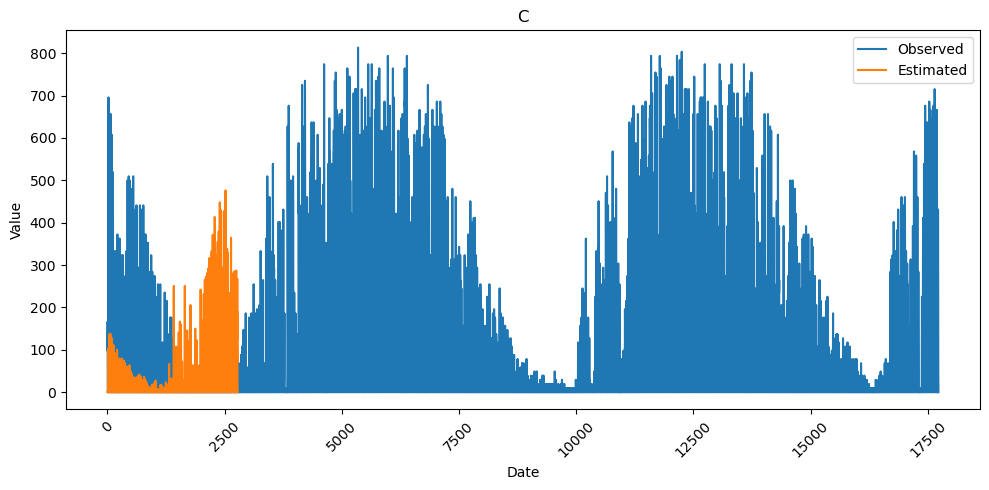

In [33]:
# Location C

plt.figure(figsize=(10, 5))

plt.plot(obs_C['pv_measurement'], label='Observed')
plt.plot(est_C['pv_measurement'], label='Estimated')

plt.title('C')
plt.xlabel('Date')  # Setting label for x-axis
plt.ylabel('Value')  # Setting label for y-axis; replace 'Value' with what's actually being measured
plt.legend()
plt.xticks(rotation=45)  # It's useful to rotate the dates for better readability
plt.tight_layout()  # This will ensure everything fits well
plt.show()


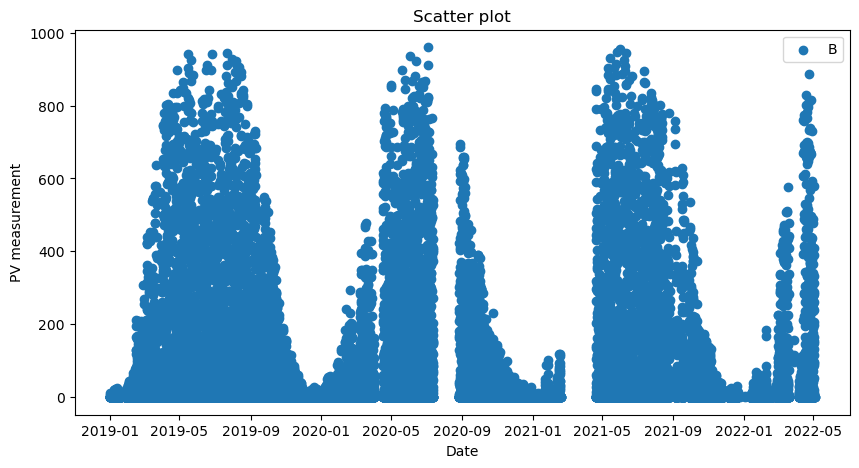

In [34]:
# Scatter plot

plt.figure(figsize=(10, 5))

plt.scatter(obs_B['date_forecast'], obs_B['pv_measurement'], label='B')

plt.title('Scatter plot')
plt.xlabel('Date')
plt.ylabel('PV measurement')
plt.legend()

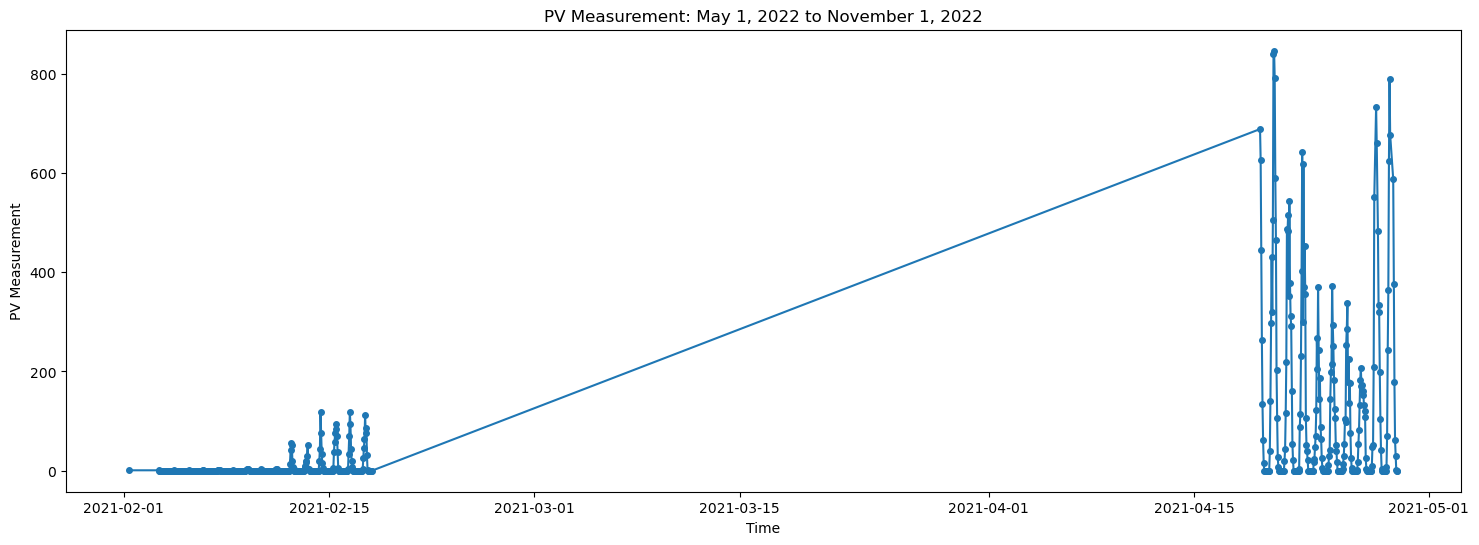

In [35]:
start_date = '2021-02-01'
end_date = '2021-05-01'
filtered_df = obs_B[(obs_B['date_forecast'] >= start_date) & (obs_B['date_forecast'] <= end_date)]

# Plotting the filtered data
plt.figure(figsize=(18, 6))
plt.plot(filtered_df['date_forecast'], filtered_df['pv_measurement'], marker='o', markersize=4, linestyle='-')
plt.title('PV Measurement: May 1, 2022 to November 1, 2022')
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.show()